In [215]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

In [216]:
import warnings
warnings.filterwarnings("ignore")

In [300]:
data = pd.read_csv("/Users/liza/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [218]:
data.shape

(1470, 35)

In [192]:
data.columns[data.isnull().sum() != 0]

Index([], dtype='object')

В наших данных нет пропущенных значений.

In [193]:
df = pd.DataFrame(data=data.nunique(), columns=['nunique'], dtype=int) # nunique - уникальные значения
df['nunique(%)'] = data.nunique()/len(data) * 100 

df['pass'] = data.isnull().sum() # pass - пропуски

for column in categorical_columns:
    df['median'] = None
    df['std'] = None
    df['min'] = None
    df['max'] = None
    

df['mean'] = data[num_columns].mean()
df['std'] = data[num_columns].std()
df['min'] = data[num_columns].min()
df['max'] = data[num_columns].max()
df['type'] = data.dtypes
df.head()


,nunique,nunique(%),pass,median,std,min,max,mean,type
Age,43,2.925170,0,None,9.135373,18.0,60.0,36.923810,int64
Attrition,2,0.136054,0,None,NaN,NaN,NaN,NaN,object
BusinessTravel,3,0.204082,0,None,NaN,NaN,NaN,NaN,object
DailyRate,886,60.272109,0,None,403.509100,102.0,1499.0,802.485714,int64
Department,3,0.204082,0,None,NaN,NaN,NaN,NaN,object


Удалим три константных признака, они не имеют никакой важности для построения модели. 

In [301]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace=True)

Теперь разберемся с EmployeeNumber. Судя по всему это уникальный номер каждого сотрудника (повторений нет и не может быть), можно заменить этот столбец на столбец индексов. 

In [302]:
data = data.set_index('EmployeeNumber')

In [196]:
categorical_columns = data.columns[data.dtypes == 'object']
num_columns = data.columns[data.dtypes == 'float64'].union(data.columns[data.dtypes == 'int64'])
len(categorical_columns), len(num_columns)

(8, 23)

Таким образом, в наших данных 8 категориальных признаков и 23 числовых. 

При подготовке данных для моделей машинного обучения необходимо проанализировать все выбросы 

Займемся поиском аномальных значений в данных (выбросов). Так как большинство признаков далеки от нормального распределения, воспользуемся методом IQR. 
IQR вычисляется, как разница между 75 и 25 перцентилями 

In [197]:
import numpy as np 

for num_col in num_columns:
    q25, q75 = np.percentile(data[num_col], 25), np.percentile(data[num_col], 75)
    iqr = q75 - q25
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data[num_col] if x < lower or x > upper]
    
    
    if len(outliers) != 0:
        
        print(num_col)
        print(lower, upper)
        print(outliers)

MonthlyIncome
-5291.0 16581.0
[19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
NumCompaniesWorked
-3.5 8.5
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9

Мы выводим название столбца, в котором есть выбросы, диапазон, в который значения столбца должны входить, и список аномальных значений.

PerformanceRating:        
1 'Low'
2 'Good'
3 'Excellent'
4 ‘Outstanding'

PerformanceRating, StockOptionLevel - это закодированные признаки one hot так что можно не рассматривать их как выбросы. 

In [200]:
data.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [201]:
q25, q75 = np.percentile(data['WorkLifeBalance'], 25), np.percentile(data['WorkLifeBalance'], 75)
q25, q75
iqr = q75 - q25
iqr

1.0

In [202]:
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
lower, upper

(0.5, 4.5)

In [203]:
outliers = [x for x in data['Age'] if x < lower or x > upper]

data.loc[data['YearsAtCompany'].isin(outliers)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,Female,78,2,4,Manager,4,Married,15427,22021,2,No,16,3,3,0,31,3,3,25,8,3,7
36,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,Female,42,2,3,Healthcare Representative,4,Married,10248,2094,3,No,14,3,4,1,24,4,3,22,6,5,17
58,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,No,12,3,4,0,23,0,3,22,15,15,8
80,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,2,Female,43,2,5,Research Director,3,Divorced,18740,16701,5,Yes,12,3,4,1,29,2,2,27,3,13,8
81,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,Female,99,3,3,Sales Executive,1,Single,7637,2354,7,No,11,3,4,0,28,3,2,21,16,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,42,No,Non-Travel,335,Research & Development,23,2,Life Sciences,4,Male,37,2,2,Research Scientist,3,Single,4332,14811,1,No,12,3,4,0,20,2,3,20,9,3,7
2015,38,No,Travel_Rarely,201,Research & Development,10,3,Medical,2,Female,99,1,3,Research Director,3,Married,13206,3376,3,No,12,3,1,1,20,3,3,18,16,1,11
2031,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,Male,56,3,5,Manager,3,Married,18880,17312,5,No,11,3,1,0,24,2,2,22,6,4,14


In [204]:
diff = data['Age'] - data['YearsAtCompany'] 
data.loc[(data['YearsAtCompany'].isin(outliers))  & (diff < 18)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [205]:
outliers_removed = [x for x in data['YearsAtCompany'] if x > lower and x < upper]
len(outliers_removed)

536

Посмотрим на пропорции целевой переменной

In [29]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [30]:
data.groupby('Attrition').describe()

Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                                                                        \
                 mean         std    min    25%    50%     75%     max   
Attrition                                                                
No         812.504461  403.208379  102.0  477.0  817.0  1176.0  1499.0   
Yes        750.362869  401.899519  103.0  408.0  699.0  1092.0  1496.0   

          DistanceFromHome                            ... YearsInCurrentRole  \
                     count       mean       std  min  ...                25%   
Attrition                                             ...                      
No                  1233.0   8.915653  8.012633  1.0  ...                2.0   
Yes                  237.0  10.632911  8.452525  1.0  ...                0.0   

                          YearsSinceLastPromotion                           \
           50%  75%   max                   count      mean       std  min   
Attrition                                                                    
No         3.0  7.0  18.0                  1233.0  2.234388  3.234762  0.0   
Yes        2.0  4.0  15.0                   237.0  1.945148  3.153077  0.0   

                               YearsWithCurrManager                           \
           25%  50%  75%   max                count      mean       std  min   
Attrition                                                                      
No         0.0  1.0  3.0  15.0               1233.0  4.367397  3.594116  0.0   
Yes        0.0  1.0  2.0  15.0                237.0  2.852321  3.143349  0.0   

                                
           25%  50%  75%   max  
Attrition                       
No         2.0  3.0  7.0  17.0  
Yes        0.0  2.0  5.0  14.0  

[2 rows x 184 columns]

In [31]:
data.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Данные не являются сбалансированными относительно целевой переменной. Покажем это с помощью графиков.

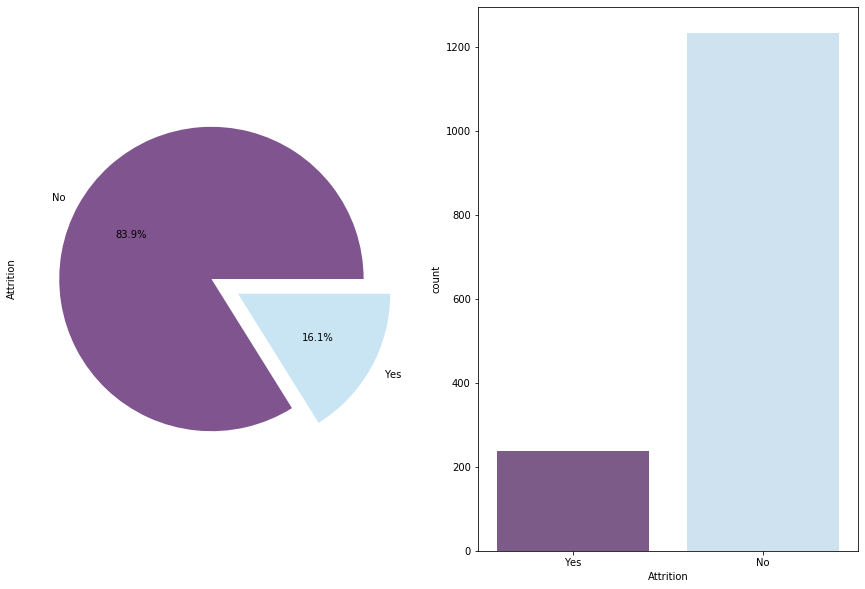

In [32]:
colors = ['#7f548f','#c9e5f4']

f,ax = plt.subplots(1,2, figsize=(15,10))
data.Attrition.value_counts().plot.pie(explode=[0,0.20], colors = colors, autopct='%1.1f%%',ax=ax[0])
sns.countplot('Attrition',data=data, palette = colors)
plt.show()

Построим матрицу корреляций, чтобы найти наиболее коррелирующие между собой признаки.

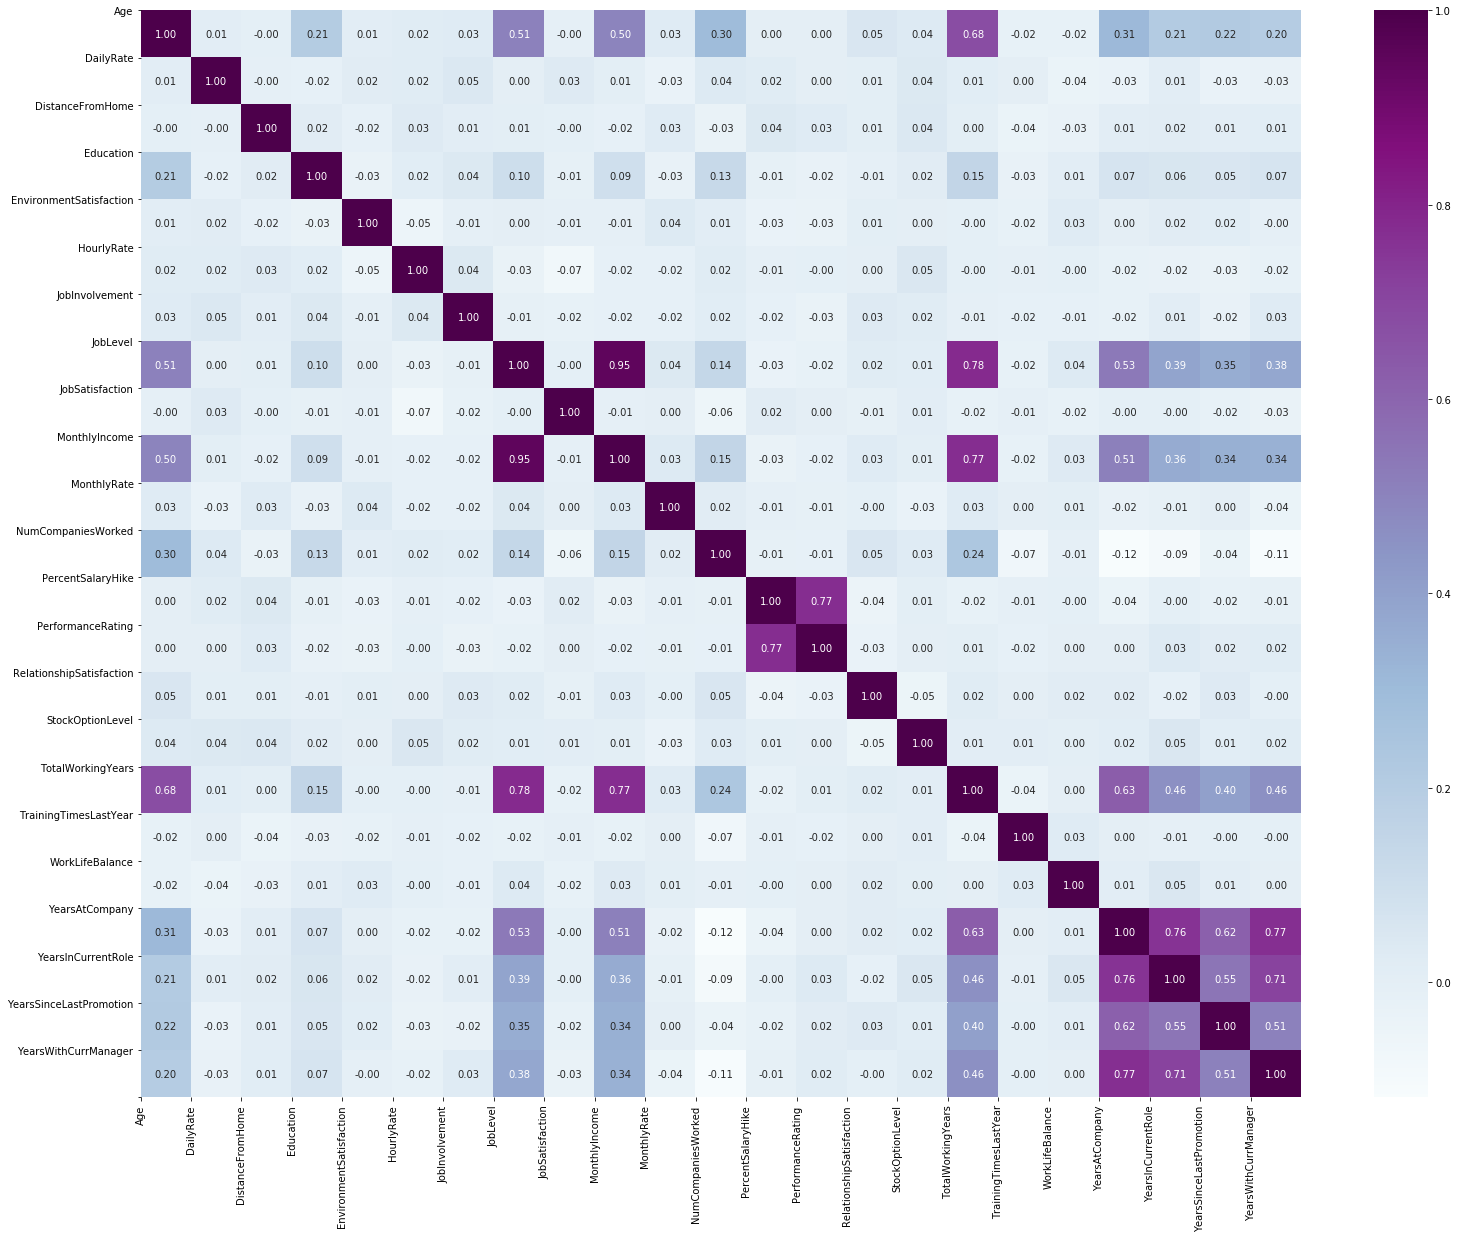

In [33]:
corr = data[num_columns].corr()

fig, ax = plt.subplots(figsize=(26, 20))

sns.heatmap(corr, cmap="BuPu", annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns) + 1), corr.columns) # о - белый 

plt.show()

In [34]:
data.corr()[lambda x: x > 0.7].head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Из графиков корреляции видно, что довольно много наших столбцов плохо коррелируют друг с другом. Как правило, при создании прогнозирующей модели было бы предпочтительнее обучать модель с функциями, которые не слишком связаны друг с другом, чтобы нам не приходилось иметь дело с избыточными функциями. В случае, если у нас достаточно много взаимосвязанных функций, возможно, можно применить такую ​​методику, как анализ основных компонентов (PCA), чтобы уменьшить пространство функций

Обратим внимание на наиболее коррелирующие признаки:
TotalWorkingYears и JobLevel, MonthlyIncome и JobLevel, MonthlyIncome и TotalWorkingYears, PercentSalaryHike и PerformanceRating, YearsInCurrentRole и YearsAtCompany, YearsWithCurrManager и YearsAtCompany, YearsWithCurrManager и YearsInCurrentRole плюс можно еще отнести Age и TotalWorkingYears (~ 0.7)

Рассмотрим распределения последних 15 признаков.

In [35]:
data.columns[15:]

Index(['MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

MonthlyIncome

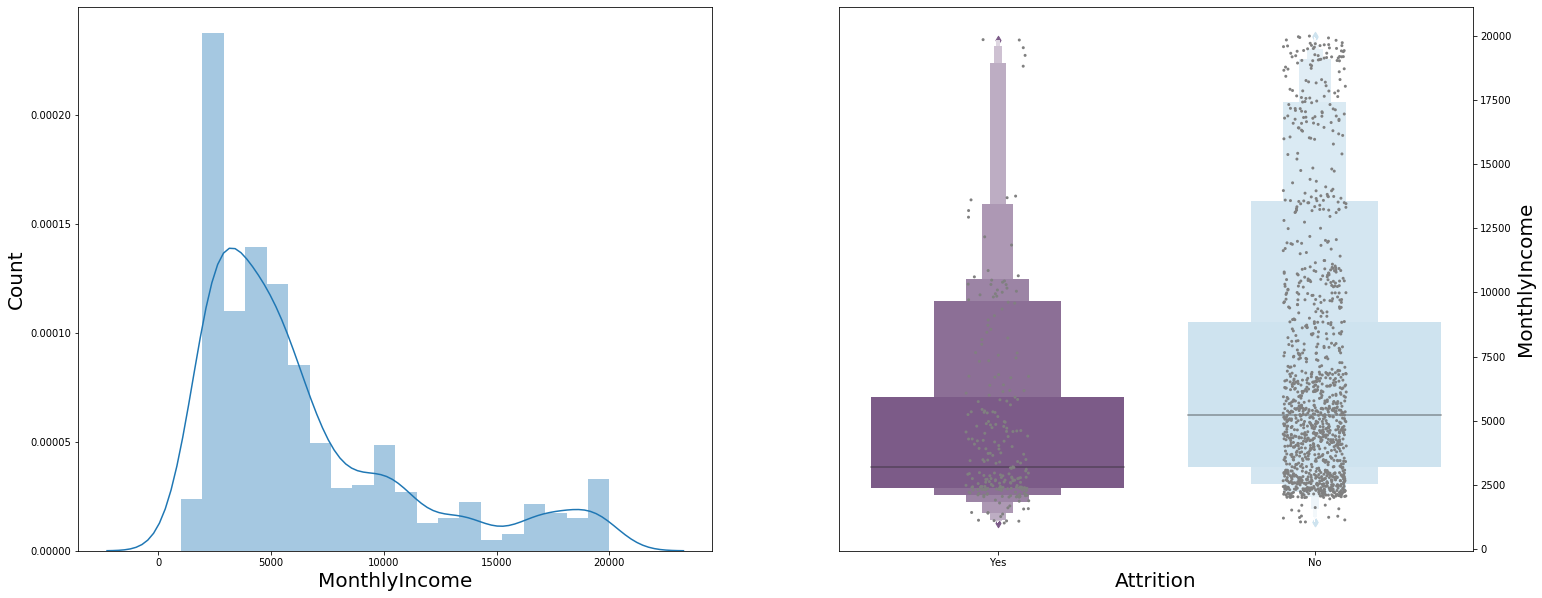

In [36]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['MonthlyIncome'], ax = axes[0])
axes[0].set_xlabel('MonthlyIncome', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'MonthlyIncome', data = data, palette= colors,  ax = axes[1])
ax = sns.stripplot(x = "Attrition", y = "MonthlyIncome", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('MonthlyIncome', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()


Попробуем убрать часть хвоста в распределении (значения, которые входят в аномальные). Порог - 16500

In [303]:
data_out = data.loc[data['MonthlyIncome'] < 16500]
data_out.shape

(1355, 31)

In [38]:
data.groupby('Attrition').JobLevel.value_counts(normalize=True)

Attrition  JobLevel
No         2           0.390916
           1           0.324412
           3           0.150852
           4           0.081914
           5           0.051906
Yes        1           0.603376
           2           0.219409
           3           0.135021
           4           0.021097
           5           0.021097
Name: JobLevel, dtype: float64

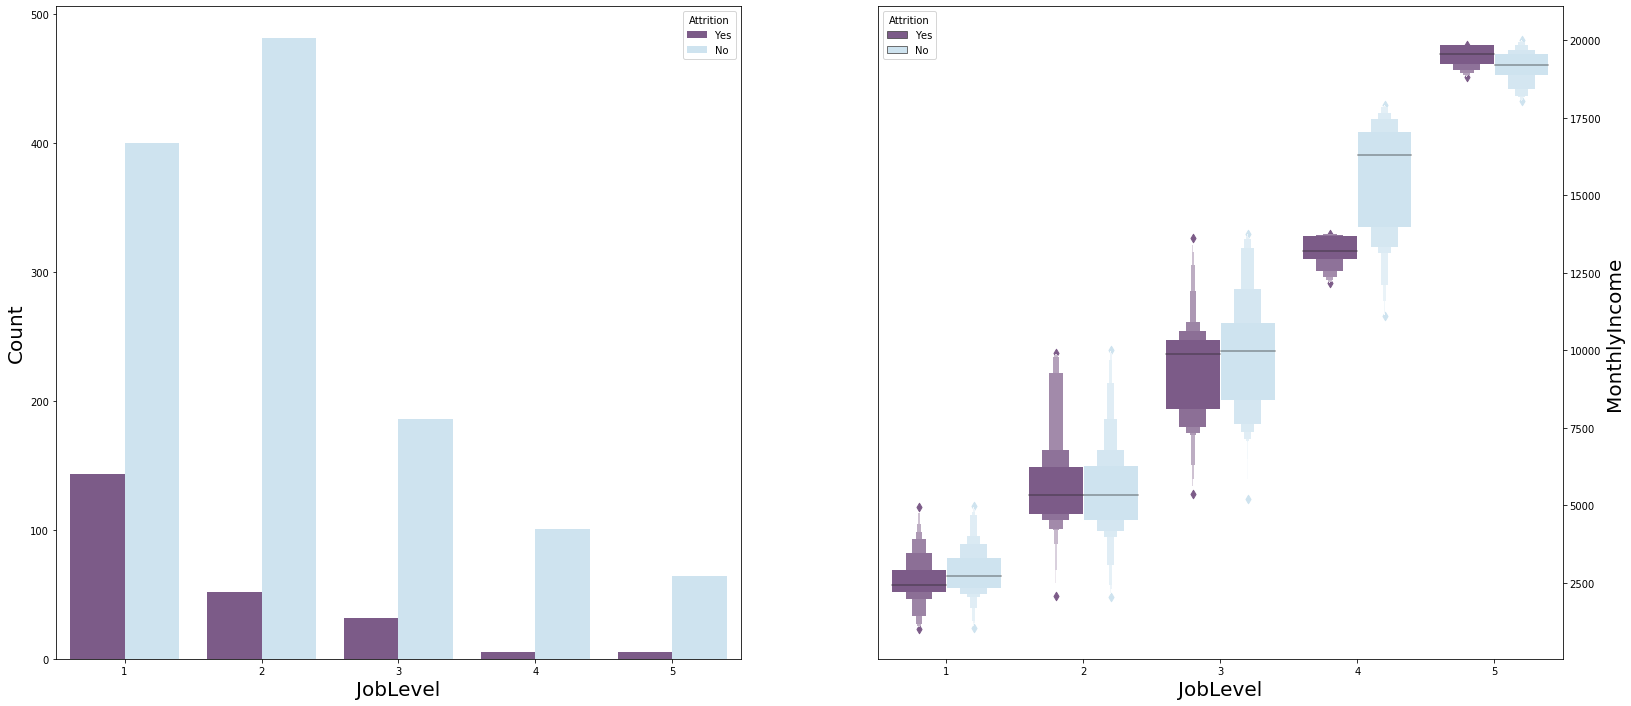

In [39]:
f, axes = plt.subplots(1, 2, figsize=(27,12))

f = sns.countplot('JobLevel',data=data, palette=colors, hue = 'Attrition', ax = axes[0])
axes[0].set_xlabel('JobLevel', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()


ax = sns.boxenplot(x = 'JobLevel', y = 'MonthlyIncome', data = data, hue = 'Attrition', palette=colors, ax = axes[1])
#ax = sns.stripplot(x = "JobLevel", y = "MonthlyIncome", data=data, color="gray", size = 3)
axes[1].set_xlabel('JobLevel', fontsize = 20)
axes[1].set_ylabel('MonthlyIncome', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()


plt.show()

Т.е чем выше JobLevel, тем выше MonthlyIncome. Среди выбывших почти 40% имеют JobLevel = 2 b и 32% JobLevel = 1.

In [40]:
data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

PerformanceRating (рейтинг производительности):
1. 'Low'
2. 'Good'
3. 'Excellent'
4. ‘Outstanding'

In [41]:
 data[data.Attrition == 'No'].PerformanceRating.value_counts()

3    1044
4     189
Name: PerformanceRating, dtype: int64

In [42]:
 data[data.Attrition == 'Yes'].PerformanceRating.value_counts()

3    200
4     37
Name: PerformanceRating, dtype: int64

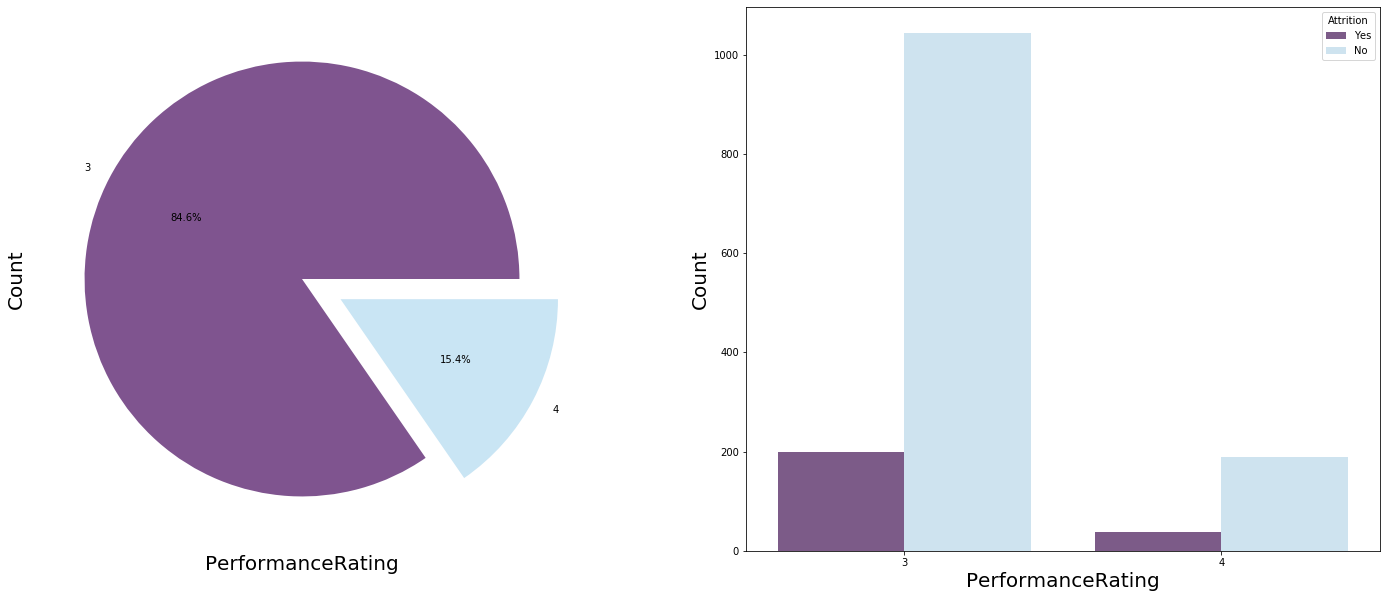

In [43]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

f = data.PerformanceRating.value_counts().plot.pie(explode=[0,0.20], colors=colors, autopct='%1.1f%%',  ax=axes[0])
axes[0].set_xlabel('PerformanceRating', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()


ax = sns.countplot('PerformanceRating',data=data, palette=colors, hue = 'Attrition', ax = axes[1])
axes[1].set_xlabel('PerformanceRating', fontsize = 20)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].yaxis.tick_left()


plt.show()

В наших данных рейтинг производительности у всех сотрудников 'Excellent' или 'Outstanding'. А процентное соотношение 'Excellent' и 'Outstanding' среди действующих и выбывших сотрудников одинаково (около 15% с максимальным рейтингом).

In [44]:
data.TotalWorkingYears.unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27])

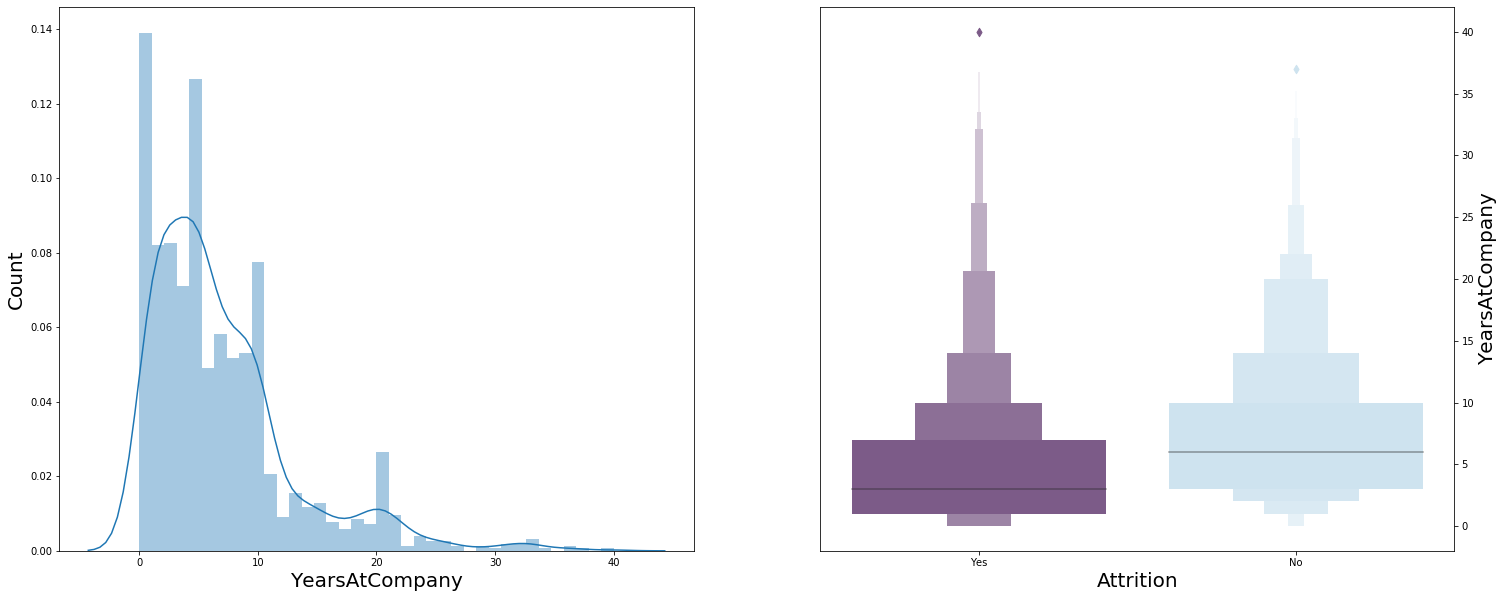

In [45]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['YearsAtCompany'], ax = axes[0])
axes[0].set_xlabel('YearsAtCompany', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'YearsAtCompany', data = data, palette= colors,  ax = axes[1])
#ax = sns.stripplot(x = "Attrition", y = "TotalWorkingYears", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('YearsAtCompany', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

убираем выбросы 

In [304]:
data_out = data_out.loc[data_out['YearsAtCompany'] < 18]

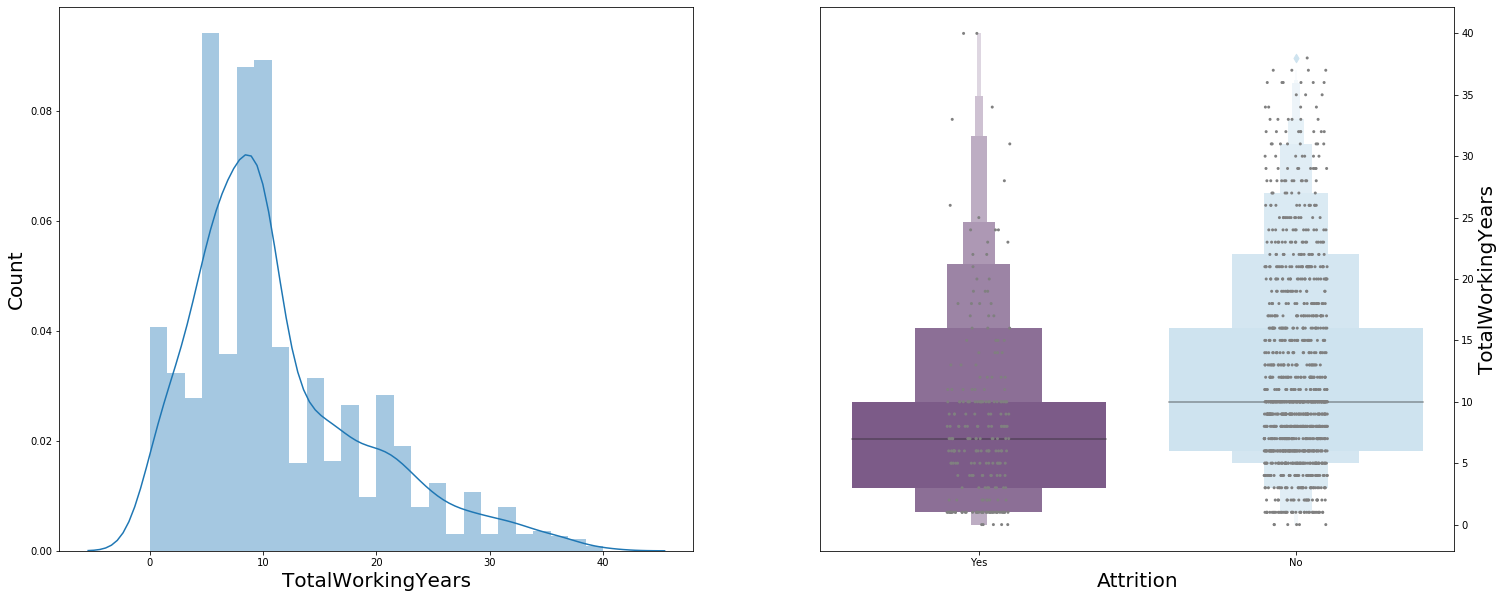

In [47]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['TotalWorkingYears'], ax = axes[0])
axes[0].set_xlabel('TotalWorkingYears', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'TotalWorkingYears', data = data, palette= colors,  ax = axes[1])
ax = sns.stripplot(x = "Attrition", y = "TotalWorkingYears", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('TotalWorkingYears', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

In [305]:
#YearsSinceLastPromotion
data_out.loc[data_out['TotalWorkingYears'] < 25]
data_out.shape

(1292, 31)

In [49]:
data.YearsWithCurrManager

EmployeeNumber
1       5
2       7
4       0
5       0
7       2
       ..
2061    3
2062    7
2064    3
2065    8
2068    2
Name: YearsWithCurrManager, Length: 1470, dtype: int64

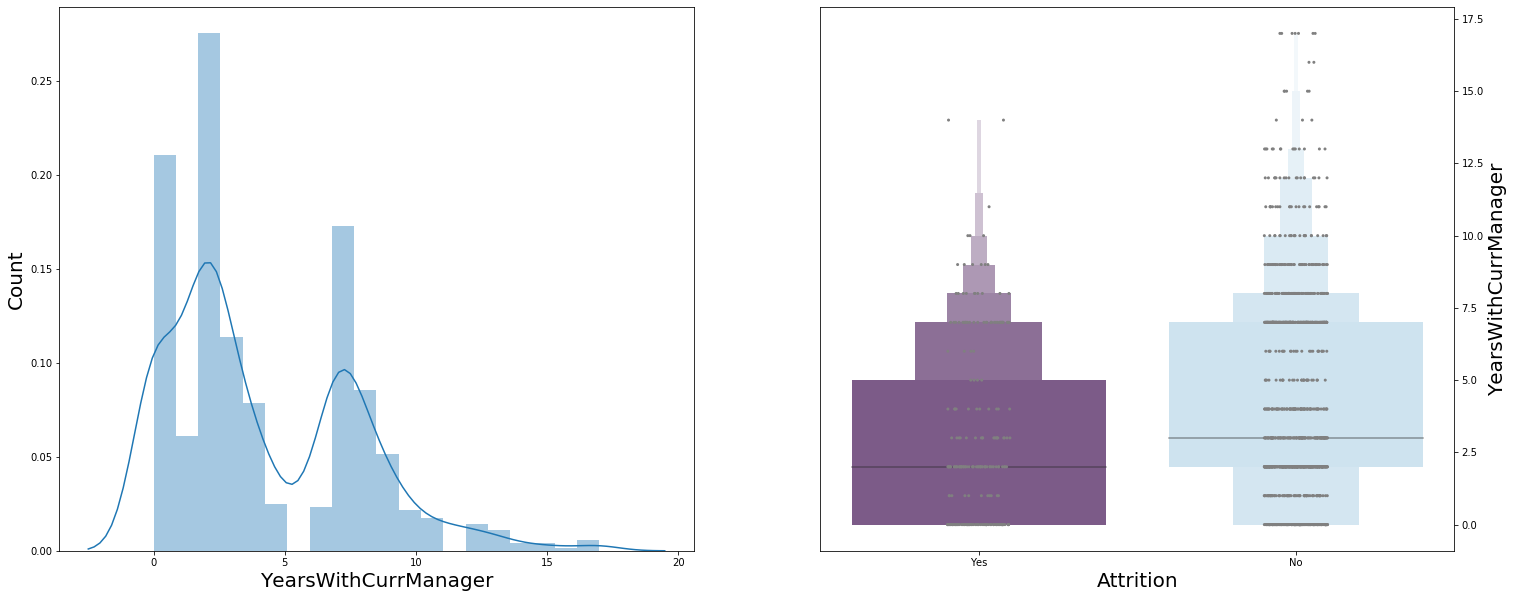

In [50]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['YearsWithCurrManager'], ax = axes[0])
axes[0].set_xlabel('YearsWithCurrManager', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'YearsWithCurrManager', data = data, palette= colors,  ax = axes[1])
ax = sns.stripplot(x = "Attrition", y = "YearsWithCurrManager", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('YearsWithCurrManager', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

In [306]:
#YearsSinceLastPromotion
data_out = data_out.loc[data['YearsWithCurrManager'] < 12]
data_out.shape


(1271, 31)

In [53]:
columns = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobLevel', 'Attrition']

pairplot показывает отношения между всеми парами переменных. Рассмотрим те признаки, которые имеют среднюю корреляцию (~0.5)

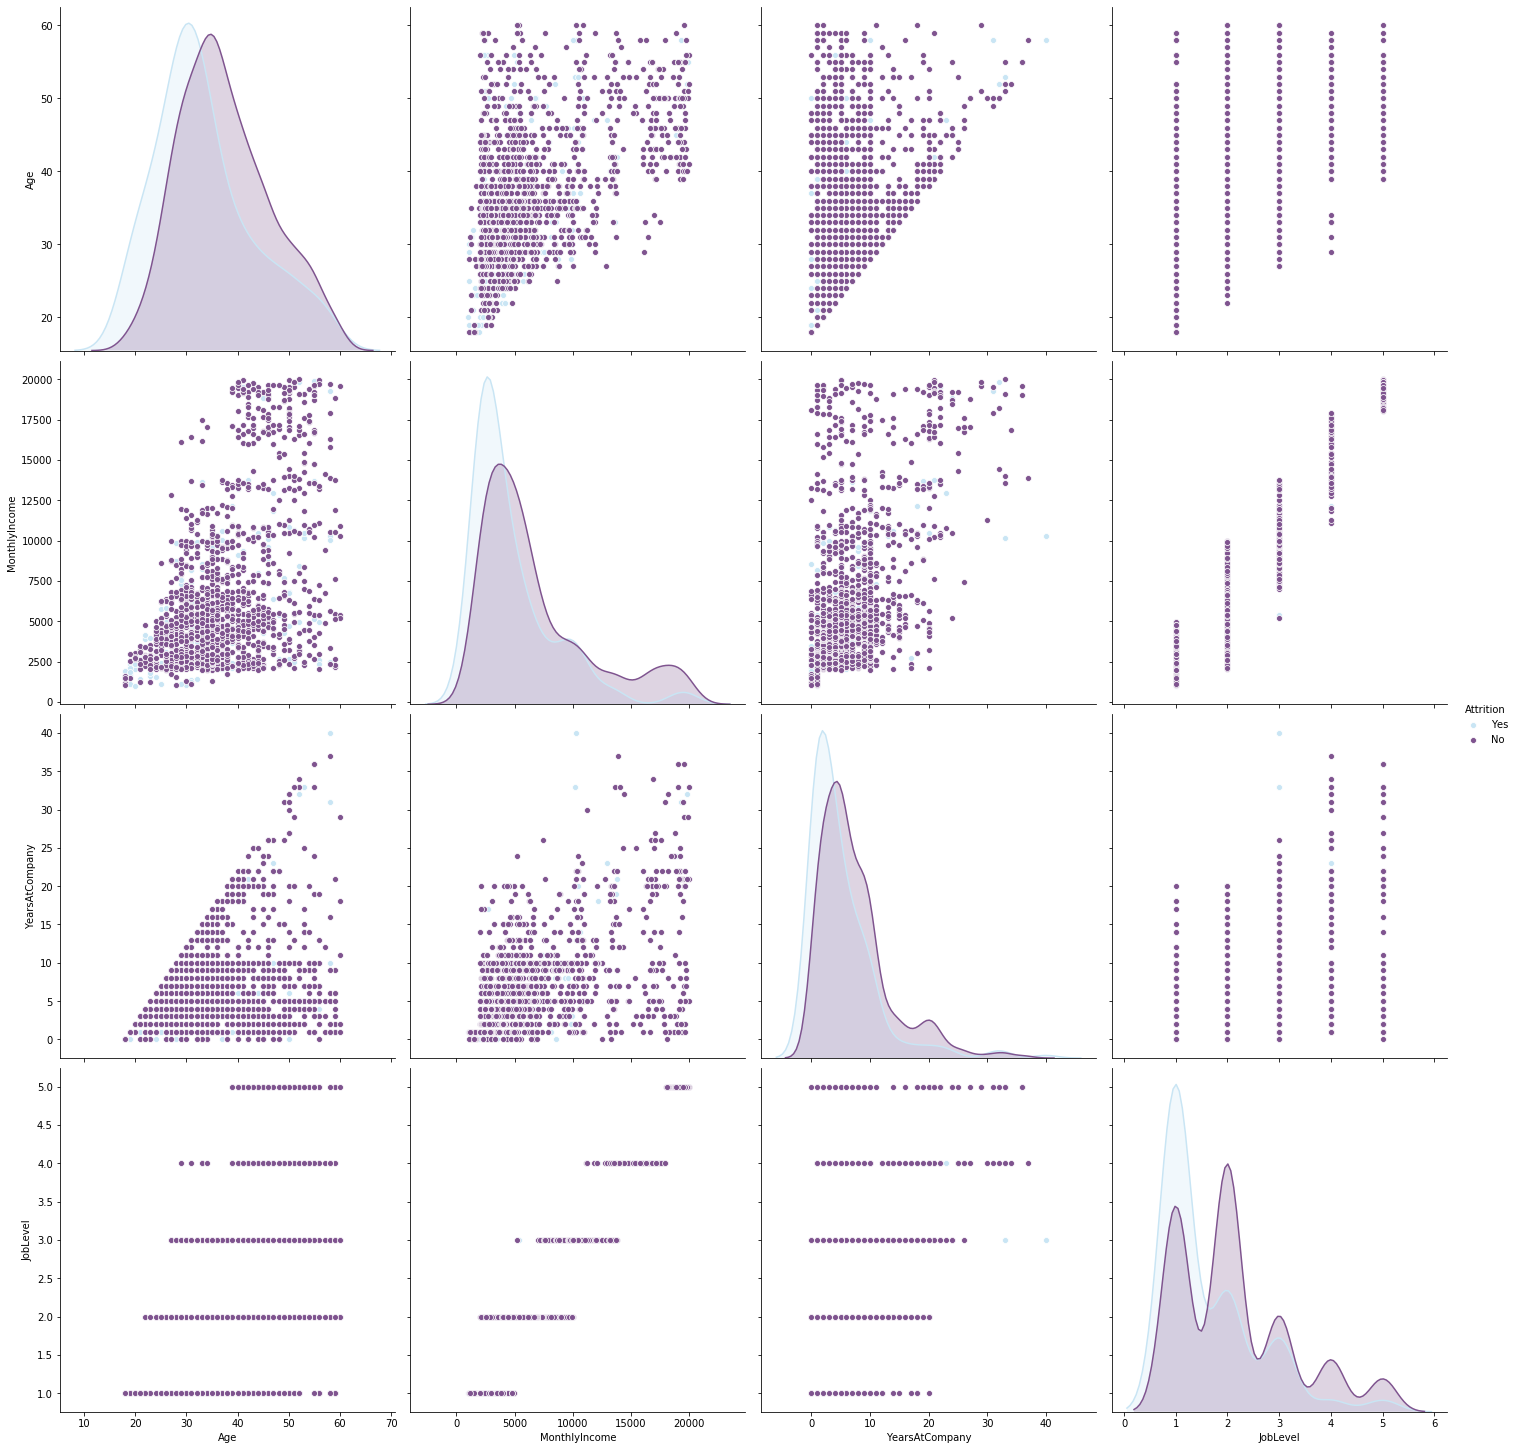

In [54]:
colors = ['#c9e5f4', '#7f548f']
sns.pairplot(data[columns], height = 5, hue = 'Attrition', kind="scatter", palette=colors)

Закономерности:
1. Чем больше возраст, тем выше месячный доход (почти нет тех, кто до 40 получает высокую зарплату) 
2. Чем выше уровень занимаемой должности, тем выше месячный доход. 
Исходя из этого, как факт никто не достигает уровня занимаемой должности 4-5 в возрасте до 30 лет (5 - только после 40).
Но также и нет сотрудников, которые после 20 лет в компании имеют уровень занимаемой должности - 1 и 2. 

3. В основном, сотрудники, которые проработали больше 25 лет в компании, имеют месячный доход выше среднего. Соответственно, если сотрудник в компании больше 20 лет, то уровень занимаемой должности больше 3 (не считая уволенных сотрудников, которые проработали в компании 30 и 40 лет). 


In [55]:
data.loc[(data.Attrition == 'Yes') & (data.JobLevel == 3) & (data.YearsAtCompany > 30)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
165,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,4,Female,94,3,3,Healthcare Representative,4,Married,10312,3465,1,No,12,3,4,1,40,3,2,40,10,15,6
1572,53,Yes,Travel_Rarely,607,Research & Development,2,5,Technical Degree,3,Female,78,2,3,Manufacturing Director,4,Married,10169,14618,0,No,16,3,2,1,34,4,3,33,7,1,9


In [56]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [57]:
Yes = data[data.Attrition == "Yes"]
No = data[data.Attrition == "No"]

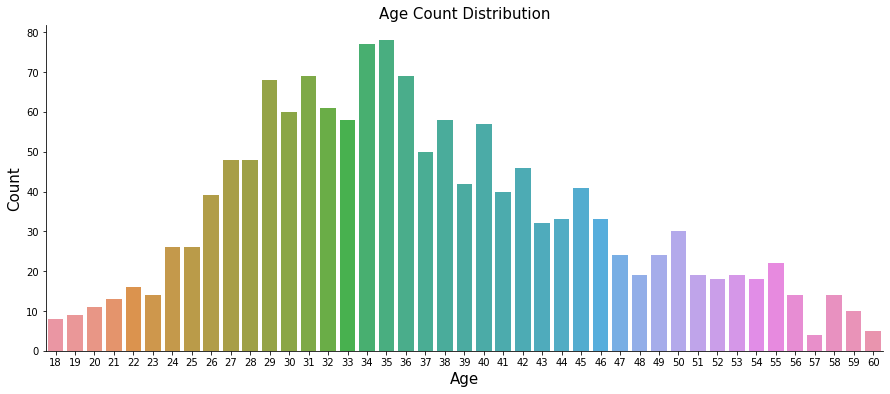

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(x = 'Age', data = data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

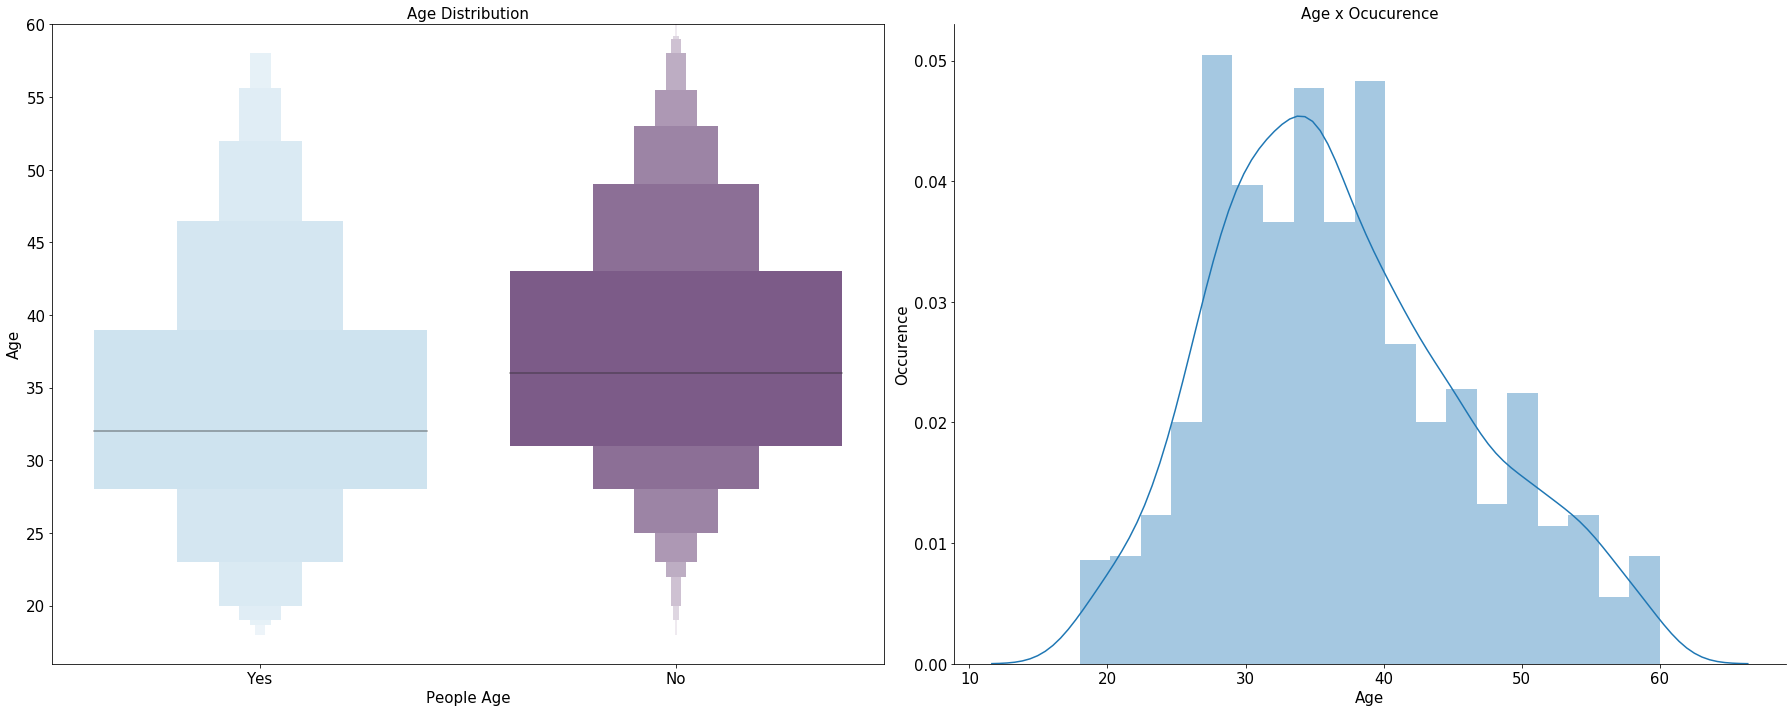

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 10))
#sns.boxplot(x = 'Age', data = data, orient = 'v', ax = ax1)
sns.boxenplot(x = 'Attrition', y = 'Age', data = data, palette= colors,  ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


sns.distplot(data['Age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

выбросов вообще нет

In [60]:
print('1º Quartile: ', data['Age'].quantile(q = 0.25))
print('2º Quartile: ', data['Age'].quantile(q = 0.50))
print('3º Quartile: ', data['Age'].quantile(q = 0.75))

1º Quartile:  30.0
2º Quartile:  36.0
3º Quartile:  43.0


In [61]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30, 'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 45), 'Age'] = 2
    dataframe.loc[dataframe['Age'] > 45, 'Age'] = 3
           
    return dataframe

age(data).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,3,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,2,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,1,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [307]:
data.Attrition = [1 if each == "Yes" else 0 for each in data.Attrition]
data_target = data.Attrition
data.drop(['Attrition'], axis = 1, inplace=True)

In [308]:
data_out.Attrition = [1 if each == "Yes" else 0 for each in data_out.Attrition]

In [309]:
data_out_target = data_out.Attrition
data_out.drop(['Attrition'], axis = 1, inplace=True)

In [310]:
len(data_out_target), len(data_out)

(1271, 1271)

In [311]:
cat_columns = data_out.columns[data_out.dtypes == 'object']
cat_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

 Закодируем признаки, в которых меньше 2 значений LabelEncoding, а где больше 2 - OneHotEncoding. 

In [312]:
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = 40

labelencoder_X = LabelEncoder()
data_out['Gender'] = labelencoder_X.fit_transform(data_out['Gender'])  
data_out['OverTime'] = labelencoder_X.fit_transform(data_out['OverTime'])
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [313]:
cat_columns = cat_columns.drop("Gender")
cat_columns = cat_columns.drop("OverTime")

In [421]:
dataset_preprocessed = pd.get_dummies(data_out, columns=cat_columns)
dataset_preprocessed

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2062,39,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2064,27,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,...,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [436]:
# Cross val metric
def cross_val_metrics(model, dataset_preprocessed):
    scores = ['accuracy', 'precision', 'recall', 'f1']
    for sc in scores:
        scores = cross_val_score(model, dataset_preprocessed, data_out_target, cv = k_fold, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [423]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_preprocessed
                                                ,data_out_target, test_size = 0.3, random_state=100, stratify=data_out_target)

In [426]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

dataset_preprocessed_scl = sc_X.fit_transform(dataset_preprocessed)

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)



In [498]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=0)

smote_train, smote_target = oversampler.fit_sample(X_train_scaled, y_train)
smote_train2, smote_target = oversampler.fit_sample(X_train, y_train)

In [425]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

чем больше параметр C, тем более сложные зависимости в данных может восстанавливать модель

In [481]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e4, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')

model.fit(smote_train, smote_target)

pred = model.predict(X_test_scaled)

In [482]:
print(accuracy_score(y_test, pred))

0.7617801047120419


In [483]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.5133689839572193

Text(0.5, 15.0, 'Predicted label')

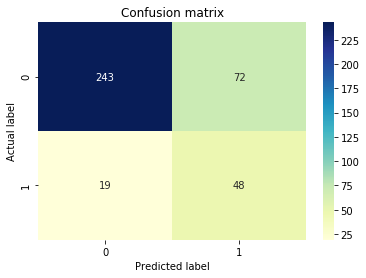

In [484]:
from sklearn import metrics

y_pred = model.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [485]:
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test_scaled), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       315
           1       0.40      0.72      0.51        67

    accuracy                           0.76       382
   macro avg       0.66      0.74      0.68       382
weighted avg       0.83      0.76      0.78       382



In [486]:
cross_val_metrics(model, dataset_preprocessed_scl)

[accuracy] : 0.86624 (+/- 0.01414)
[precision] : 0.68578 (+/- 0.11823)
[recall] : 0.45901 (+/- 0.07552)
[f1] : 0.54239 (+/- 0.06887)


In [487]:
test_scores = []
train_scores = []

for i in range(1, 15):

    knn = KNeighborsClassifier(i)
    knn.fit(smote_train, smote_target)
    
    test_scores.append(knn.score(X_test_scaled,y_test))

In [488]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.6544502617801 % and k = [2]


In [489]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(2)
classifier_knn.fit(smote_train, smote_target)

knn = classifier_knn.predict(X_test_scaled)

print(accuracy_score(y_test, knn))

0.756544502617801


In [490]:
from sklearn.metrics import f1_score
f1_score(y_test, knn)

0.29007633587786263

Text(0.5, 15.0, 'Predicted label')

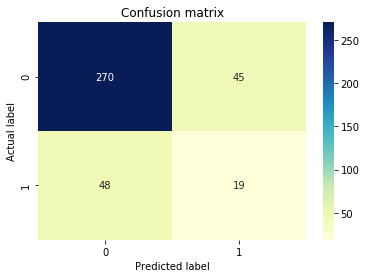

In [491]:
from sklearn import metrics

y_pred = classifier_knn.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [492]:
cross_val_metrics(classifier_knn, dataset_preprocessed_scl)

[accuracy] : 0.82928 (+/- 0.02245)
[precision] : 0.55667 (+/- 0.17436)
[recall] : 0.10522 (+/- 0.05944)
[f1] : 0.17379 (+/- 0.09042)


In [493]:
from sklearn.svm import SVC

svc = SVC(kernel = 'sigmoid')
svc.fit(smote_train, smote_target)
pred = svc.predict(X_test_scaled)

print(accuracy_score(y_test, pred))

0.7382198952879581


In [494]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.504950495049505

Text(0.5, 15.0, 'Predicted label')

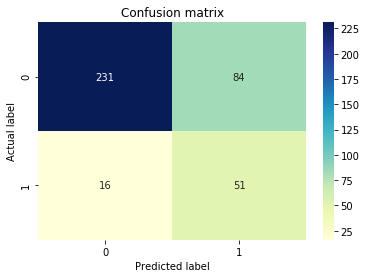

In [495]:
from sklearn import metrics

y_pred = svc.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [496]:
cross_val_metrics(svc, dataset_preprocessed_scl)

[accuracy] : 0.86311 (+/- 0.01688)
[precision] : 0.74424 (+/- 0.16860)
[recall] : 0.35111 (+/- 0.08496)
[f1] : 0.46844 (+/- 0.09707)


In [499]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(max_features=20, max_leaf_nodes=200, random_state = 33)
classifier_dt.fit(smote_train2, smote_target)

tree = classifier_dt.predict(X_test)
print(accuracy_score(y_test, tree))

0.7094240837696335


In [500]:
from sklearn.metrics import f1_score
f1_score(y_test, tree)

0.31901840490797545

Text(0.5, 15.0, 'Predicted label')

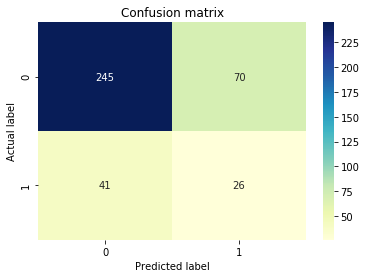

In [501]:
from sklearn import metrics

y_pred = classifier_dt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [502]:
cross_val_metrics(classifier_dt, dataset_preprocessed)

[accuracy] : 0.76475 (+/- 0.02482)
[precision] : 0.33680 (+/- 0.05354)
[recall] : 0.35370 (+/- 0.08608)
[f1] : 0.34135 (+/- 0.06018)


In [503]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(smote_train2, smote_target)
class_ = classifier_rf.predict(X_test)

print(accuracy_score(y_test, class_))

0.856020942408377


In [504]:
from sklearn.metrics import f1_score
f1_score(y_test, class_)

0.4210526315789473

Text(0.5, 15.0, 'Predicted label')

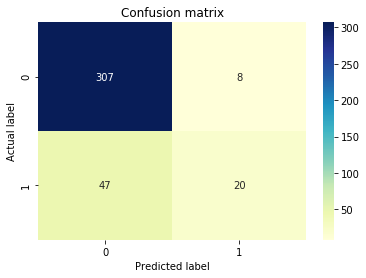

In [505]:
from sklearn import metrics

y_pred = classifier_rf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [506]:
cross_val_metrics(classifier_rf, dataset_preprocessed)

[accuracy] : 0.84420 (+/- 0.01542)
[precision] : 0.83333 (+/- 0.23570)
[recall] : 0.13628 (+/- 0.06800)
[f1] : 0.22920 (+/- 0.10505)


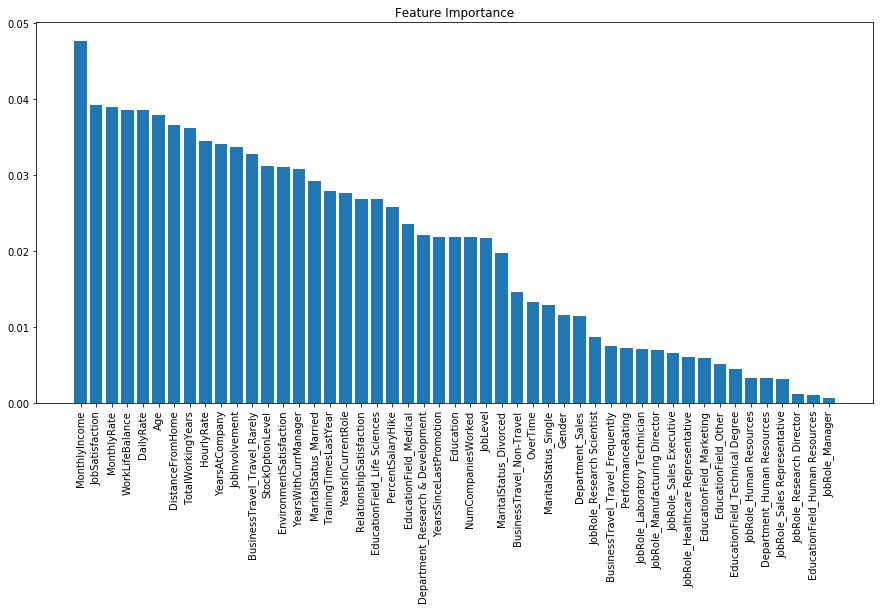

In [507]:
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(X_train.shape[1]), importances[indices]) 
plt.xticks(range(X_train.shape[1]), names, rotation=90) 
plt.show() 

In [508]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 30,
    'verbose': 0
}

In [509]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train2, smote_target)

pred = gb.predict(X_test)

print(accuracy_score(y_test, pred))

0.8717277486910995


In [510]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.5333333333333332

Text(0.5, 15.0, 'Predicted label')

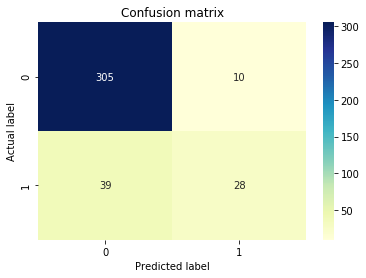

In [511]:
from sklearn import metrics

y_pred = gb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [512]:
cross_val_metrics(gb, dataset_preprocessed)

[accuracy] : 0.86153 (+/- 0.01725)
[precision] : 0.72379 (+/- 0.14791)
[recall] : 0.37545 (+/- 0.03609)
[f1] : 0.48743 (+/- 0.04480)


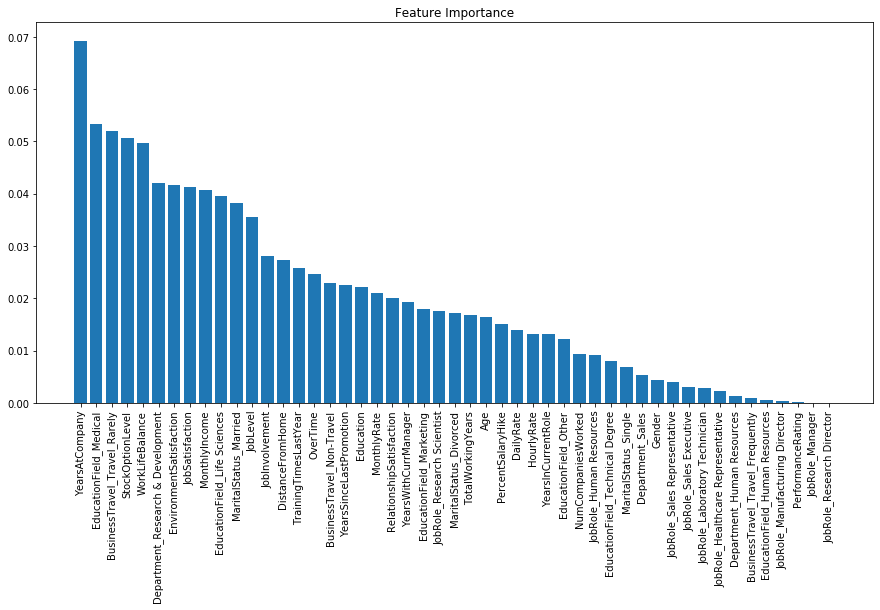

In [476]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(X_train.shape[1]), importances[indices]) 
plt.xticks(range(X_train.shape[1]), names, rotation=90) 
plt.show() 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_new = GradientBoostingClassifier(**gb_params)
gb_new.fit(smote_train, smote_target)

pred = gb.predict(X_test)

print(accuracy_score(y_test, pred))